In [2]:
import os
import data_processing
from embeddings import perform_nmf, perform_pca, perform_svd
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.model_selection import train_test_split

In [3]:
'''
if not os.path.exists('data/books.csv'):
    data_processing.load_books()

create_ratings = not os.path.exists('data/ratings.csv')
create_read = not os.path.exists('data/read.csv')
create_shelved = not os.path.exist('data/shelved.csv')

if create_ratings or create_read or create_shelved:
    data_processing.load_interactions(ratings=create_ratings,
                                      read=create_read,
                                      shelved=create_shelved)
'''

"\nif not os.path.exists('data/books.csv'):\n    data_processing.load_books()\n\ncreate_ratings = not os.path.exists('data/ratings.csv')\ncreate_read = not os.path.exists('data/read.csv')\ncreate_shelved = not os.path.exist('data/shelved.csv')\n\nif create_ratings or create_read or create_shelved:\n    data_processing.load_interactions(ratings=create_ratings,\n                                      read=create_read,\n                                      shelved=create_shelved)\n"

In [4]:
# Test train split user_id

In [5]:
ratings = pd.read_csv('data/ratings.csv')

In [6]:
train_ids = pd.read_csv('data/train_ids.csv')

In [7]:
ratings = ratings[ratings['user_id'].isin(train_ids['user_id'])].drop(columns=['Unnamed: 0', 'user_id'])

In [8]:
#perform_pca(ratings, 'user_ratings')

In [9]:
#perform_svd(ratings, 'user_ratings')

In [11]:
perform_nmf(ratings, 'user_ratings', n_components=100)

In [12]:
pca_info = pd.read_csv('user_ratings_pca_info.csv')

In [13]:
pca_info.head()

,explained_variance_ratio,singular_values
0,0.047463,4765.914071
1,0.032868,3966.005873
2,0.018308,2959.972051
3,0.016084,2774.382229
4,0.012774,2472.491357


In [15]:
pca_info = pca_info.reset_index().rename(columns={'index': 'pc'})

<AxesSubplot:xlabel='pc', ylabel='explained_variance_ratio'>

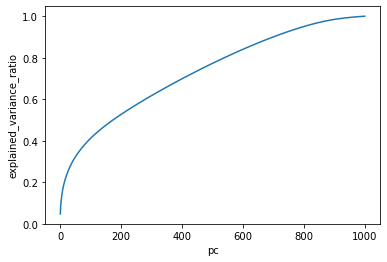

In [16]:
sns.lineplot(x=pca_info['pc'], y=np.cumsum(pca_info['explained_variance_ratio']))

In [18]:
pc = 0
for x in np.cumsum(pca_info['explained_variance_ratio']):
    if x >= 0.80:
        print(f'80% Explained Variance at PC_{pc}')
        break
    pc += 1

80% Explained Variance at PC_538
